<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-06-05 16:05:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 142.250.107.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   214MB/s    in 0.5s    

2025-06-05 16:05:48 (214 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
# Another way of counting the number of images in folder
# it lists all the names in a directory
num_img_train_pizza = len(os.listdir("pizza_steak/train/pizza"))
print(num_img_train_pizza)

750


# Get the class names programmatically,

In [6]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
# converts that string into a Path object, which is more powerful and flexible for file and directory operations
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) # '*' lists all files
print(class_names)

['pizza' 'steak']


# View images randomly

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1) # picks a random image path from all the filnames

  img = mpimg.imread(target_folder + "/" + random_image[0])

  print(f'image shape = {img.shape}')
  return img


image shape = (289, 512, 3)


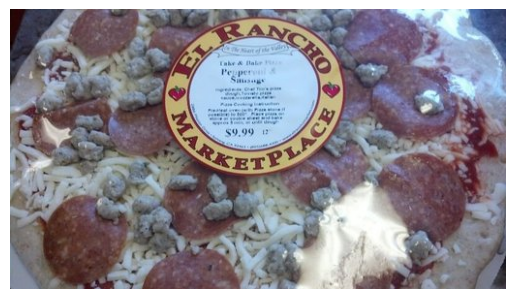

In [10]:
img = view_random_image('pizza_steak/train/','pizza')
plt.imshow(img)
plt.axis("off"); # It prevents the object info (like <AxesSubplot:>) from being printed in the output cell.

array([[[ 25,   6,   2],
        [ 27,   8,   4],
        [ 32,   8,   6],
        ...,
        [ 46,  58,  98],
        [ 49,  58,  99],
        [ 48,  57,  98]],

       [[ 25,   6,   2],
        [ 28,   7,   4],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 50,  59, 100],
        [ 47,  56,  97]],

       [[ 26,   7,   3],
        [ 29,   8,   5],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 48,  57,  98],
        [ 44,  53,  94]],

       ...,

       [[123, 132, 149],
        [126, 135, 152],
        [129, 138, 155],
        ...,
        [ 64,  58,  68],
        [ 66,  58,  69],
        [ 67,  59,  70]],

       [[119, 126, 142],
        [122, 131, 146],
        [127, 136, 153],
        ...,
        [ 66,  63,  74],
        [ 66,  60,  72],
        [ 65,  59,  71]],

       [[ 79,  86,  96],
        [121, 129, 140],
        [130, 137, 153],
        ...,
        [ 71,  69,  82],
        [ 73,  69,  83],
        [ 67,  63,  77]]], dtype=uint8)
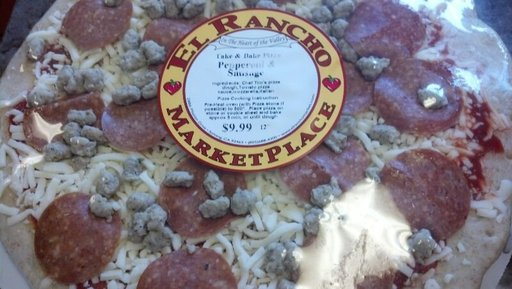

In [11]:
img

# Pre-processing

## normalizing an image

In [12]:
img/255

array([[[0.09803922, 0.02352941, 0.00784314],
        [0.10588235, 0.03137255, 0.01568627],
        [0.1254902 , 0.03137255, 0.02352941],
        ...,
        [0.18039216, 0.22745098, 0.38431373],
        [0.19215686, 0.22745098, 0.38823529],
        [0.18823529, 0.22352941, 0.38431373]],

       [[0.09803922, 0.02352941, 0.00784314],
        [0.10980392, 0.02745098, 0.01568627],
        [0.12941176, 0.03529412, 0.02745098],
        ...,
        [0.19607843, 0.24313725, 0.4       ],
        [0.19607843, 0.23137255, 0.39215686],
        [0.18431373, 0.21960784, 0.38039216]],

       [[0.10196078, 0.02745098, 0.01176471],
        [0.11372549, 0.03137255, 0.01960784],
        [0.12941176, 0.03529412, 0.02745098],
        ...,
        [0.19607843, 0.24313725, 0.4       ],
        [0.18823529, 0.22352941, 0.38431373],
        [0.17254902, 0.20784314, 0.36862745]],

       ...,

       [[0.48235294, 0.51764706, 0.58431373],
        [0.49411765, 0.52941176, 0.59607843],
        [0.50588235, 0

# End to End CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess the data (get all the values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# set up paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import the data from the directory and load them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
# building the model (tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.5945 - loss: 0.6561 - val_accuracy: 0.8060 - val_loss: 0.4251
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.7697 - loss: 0.4812 - val_accuracy: 0.8520 - val_loss: 0.3837
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8127 - loss: 0.4270 - val_accuracy: 0.8580 - val_loss: 0.3706
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8261 - loss: 0.3901 - val_accuracy: 0.8580 - val_loss: 0.3687
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8198 - loss: 0.4118 - val_accuracy: 0.8520 - val_loss: 0.3758


Text(0.5, 1.0, 'Loss after epoch')

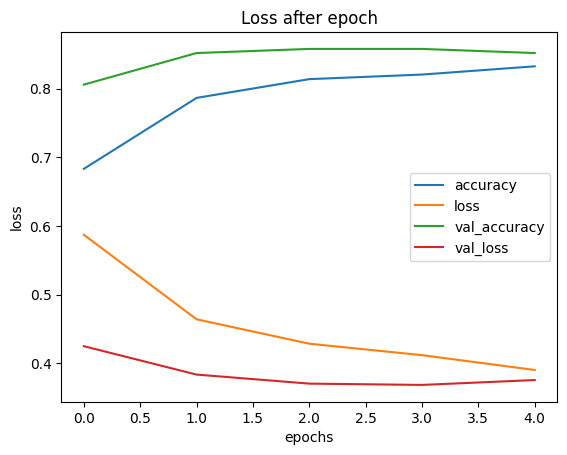

In [12]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# classification NN on picture dataset

## model 2

In [16]:
# set random seed
tf.random.set_seed(42)

# build the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compiling the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.4800 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.4846 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.4917 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Text(0.5, 1.0, 'Loss after epoch')

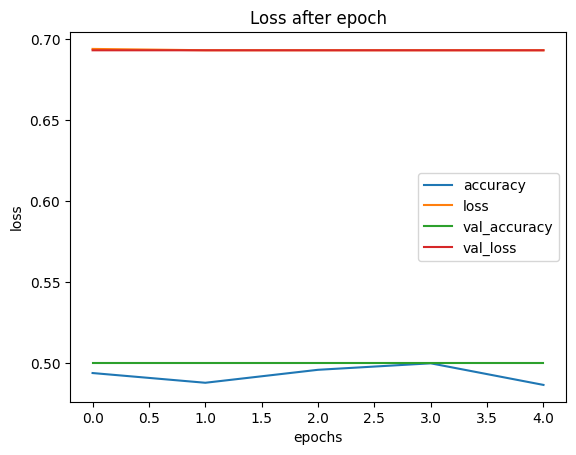

In [17]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

## model 3

In [18]:
# set random seed
tf.random.set_seed(42)

# build the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5906 - loss: 9.9710 - val_accuracy: 0.7700 - val_loss: 1.0343
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7357 - loss: 0.8769 - val_accuracy: 0.7720 - val_loss: 0.4571
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7361 - loss: 0.8391 - val_accuracy: 0.7180 - val_loss: 1.4073
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.7421 - loss: 0.9935 - val_accuracy: 0.7340 - val_loss: 0.6099
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7823 - loss: 0.5648 - val_accuracy: 0.7420 - val_loss: 0.5622


In [19]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,914,245 (110.30 MB)

 Trainable params: 9,638,081 (36.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,276,164 (73.53 MB)

# knowing your data

image shape = (512, 512, 3)


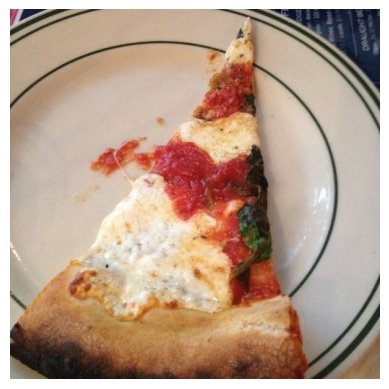

In [13]:
img = view_random_image('pizza_steak/train/','pizza')
plt.imshow(img)
plt.axis("off");

In [21]:
img.shape

(384, 512, 3)

image shape = (384, 512, 3)


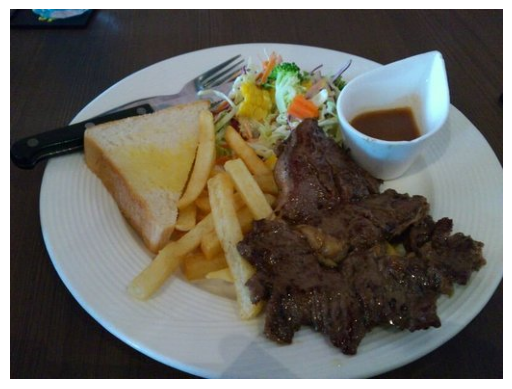

In [22]:
img_2 = view_random_image('pizza_steak/train/','steak')
plt.imshow(img_2)
plt.axis('off');

# Preprocess data

In [14]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                                class_mode = 'binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size = (224,224),
                                                class_mode = 'binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
len(train_data)

47

In [9]:
images, labels = train_data[0]
len(images), len(labels)

(32, 32)

In [11]:
images[0].shape, labels[0]

((224, 224, 3), np.float32(0.0))

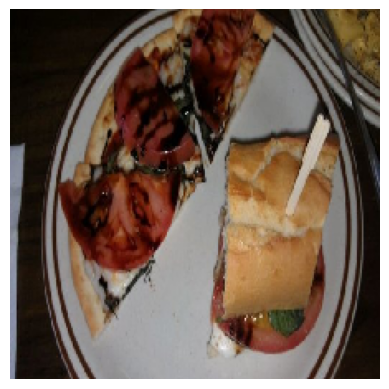

In [12]:
plt.imshow(images[0])
plt.axis('off');

# Baseline Model

In [23]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,'sigmoid')
])

In [24]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [25]:
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data,),
                        validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.6825 - loss: 0.7988 - val_accuracy: 0.8340 - val_loss: 0.3992
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8106 - loss: 0.4061 - val_accuracy: 0.8400 - val_loss: 0.3804
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.9088 - loss: 0.2677 - val_accuracy: 0.8140 - val_loss: 0.3956
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9282 - loss: 0.2125 - val_accuracy: 0.8440 - val_loss: 0.3423
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9748 - loss: 0.1008 - val_accuracy: 0.8220 - val_loss: 0.3785


In [26]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8232 - loss: 0.3777


[0.37847089767456055, 0.8220000267028809]

## Evaluating baseline model

In [27]:
import matplotlib.pyplot as plt

In [28]:
model_4_df = pd.DataFrame(history_4.history)
model_4_df.head()

accuracy      loss  val_accuracy  val_loss
0  0.734667  0.592367         0.834  0.399213
1  0.830000  0.386032         0.840  0.380408
2  0.894667  0.285475         0.814  0.395614
3  0.936000  0.191201         0.844  0.342307
4  0.978000  0.091019         0.822  0.378471

In [17]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

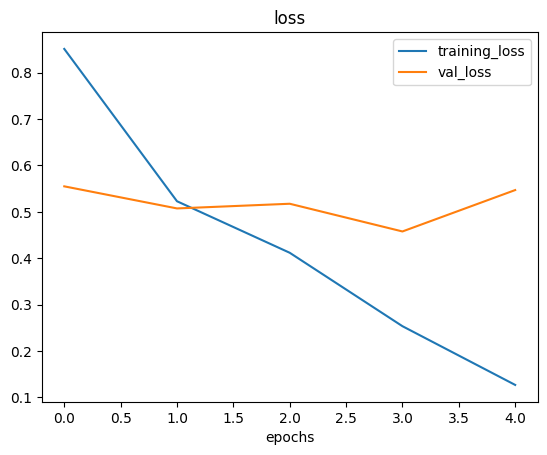

In [20]:
plot_loss_curves(history_4)

In [18]:
def plot_accuracy_curves(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(accuracy))

  plt.plot(epochs,accuracy,label='accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

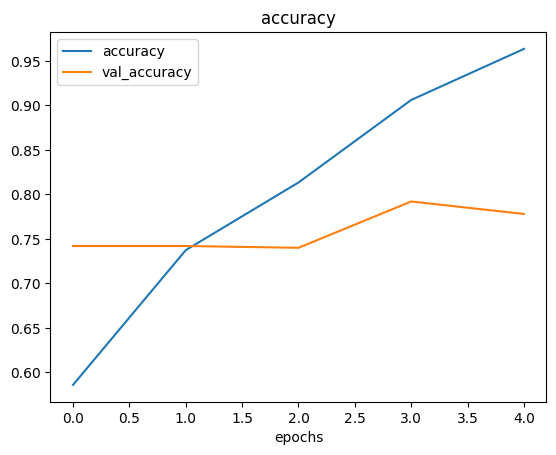

In [22]:
plot_accuracy_curves(history_4)

* What to do when the training loss is getting better but the validation loss on average remains the same or even gets worse.

* when you start seeing the validdation loss getting worse it probably means the model is overfitting the training data.

* So from the graphs we can say that our baseline model with just the Conv2D layers is over fitting the training data, let see if adding the maxpool layer could prevent over fitting

* Ways to reduce overfitting -
          1. add data augmentation
          2. add regularization layers (MaxPool layers)
          3. add more data .....

# Model 5, with MaxPool

In [19]:
# create the model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.6080 - loss: 0.6510 - val_accuracy: 0.7800 - val_loss: 0.4842
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7910 - loss: 0.4833 - val_accuracy: 0.8380 - val_loss: 0.3874
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.8297 - loss: 0.3986 - val_accuracy: 0.8400 - val_loss: 0.3782
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8350 - loss: 0.3891 - val_accuracy: 0.8240 - val_loss: 0.3770
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8246 - loss: 0.3758 - val_accuracy: 0.8600 - val_loss: 0.3248


**If the convolutional layer finds the features of an image the max pool layer finds the most important parts of the features**

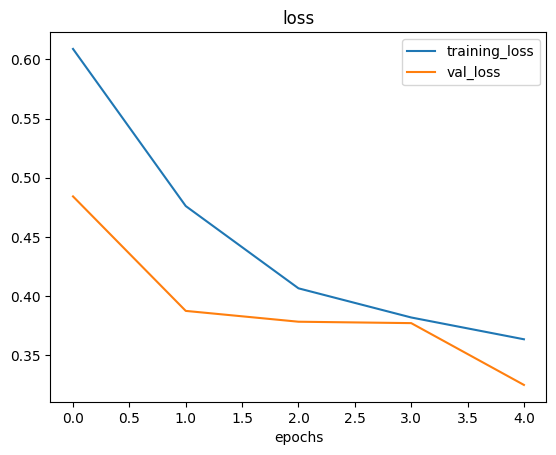

In [20]:
plot_loss_curves(history_5)

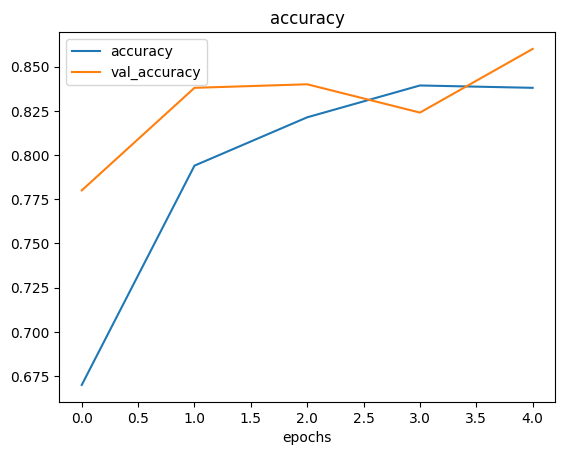

In [21]:
plot_accuracy_curves(history_5)

**Another way to see if the model is overfitting or underfitting is if the training_loss curve and the validadtion loss curve have different shapes. When they have a similar shape that means there is no overfitting or underfitting**

**Reducing overfitting is also called as regularization**

In [29]:
model_4.evaluate(test_data), model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8204 - loss: 0.3693
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8652 - loss: 0.3234


([0.37847083806991577, 0.8220000267028809],
 [0.3248012959957123, 0.8600000143051147])

# Data Augmentation

  1. Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more genrerizable patterns.
  2. Altering it could mean rotating an image, flipping it, cropping it or something similar.

In [30]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,# value in percentage
                                             shear_range=0.2,#how much you wanna shear the image
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
# Note that all these data manipulations wont happen at the same time all the time. it is done randomly again
# to induce diversity.

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Data augmentation is only done on the training data as its only for making the model better trained by providing diversity in the inputs.**

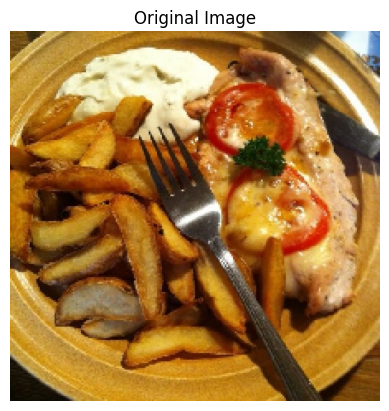

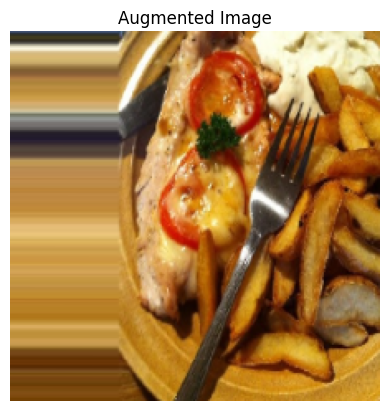

In [33]:
import random
val = random.randint(0,len(train_data_augmented))

images, labels = train_data[val]
plt.imshow(images[0])
plt.title("Original Image")
plt.axis(False);

plt.figure()
images_augmented, labels_augmented = train_data_augmented[val]
plt.imshow(images_augmented[0])
plt.title("Augmented Image")
plt.axis(False);

**From the above 2 images we can see the effects of data augmentation.**

# Model 6, model 5 with augmentation

In [34]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# The reason why the steps take longer is because data augmentation is done when the model is training as and then.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 458ms/step - accuracy: 0.4950 - loss: 0.7416 - val_accuracy: 0.5020 - val_loss: 0.6896
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.5071 - loss: 0.6928 - val_accuracy: 0.7780 - val_loss: 0.6790
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.5949 - loss: 0.6866 - val_accuracy: 0.8240 - val_loss: 0.6400
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 410ms/step - accuracy: 0.6619 - loss: 0.6601 - val_accuracy: 0.7900 - val_loss: 0.5304
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 412ms/step - accuracy: 0.6481 - loss: 0.6430 - val_accuracy: 0.7460 - val_loss: 0.5132


In [35]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8867 - loss: 0.3431


[0.5132394433021545, 0.7459999918937683]

# Model 7, model 6 with shuffled training data

In [36]:
# lets shuffle the data
train_data_augmented_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


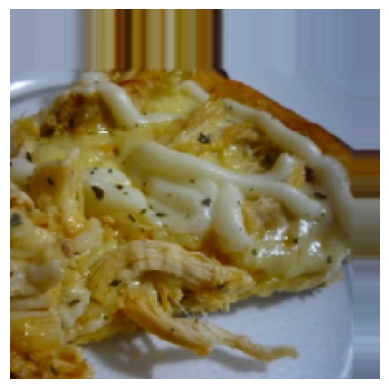

In [38]:
images, labels = train_data_augmented_shuf[0]
plt.imshow(images[0])
plt.axis('off');

In [39]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuf,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuf),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 433ms/step - accuracy: 0.5675 - loss: 0.6795 - val_accuracy: 0.8020 - val_loss: 0.5326
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - accuracy: 0.7137 - loss: 0.5833 - val_accuracy: 0.7880 - val_loss: 0.4748
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.7405 - loss: 0.5424 - val_accuracy: 0.7940 - val_loss: 0.4399
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 453ms/step - accuracy: 0.7398 - loss: 0.5311 - val_accuracy: 0.8360 - val_loss: 0.4103
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.7446 - loss: 0.5410 - val_accuracy: 0.8420 - val_loss: 0.4015


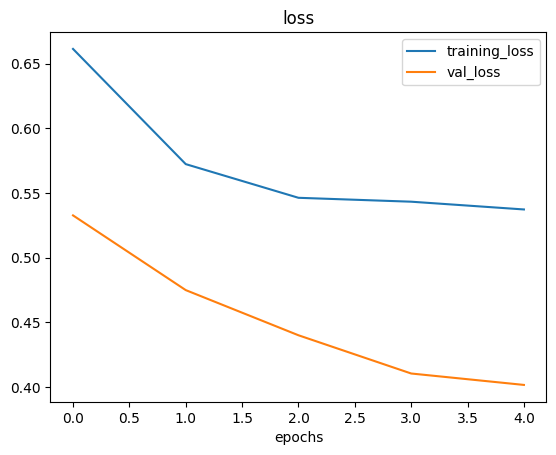

In [40]:
plot_loss_curves(history_7)

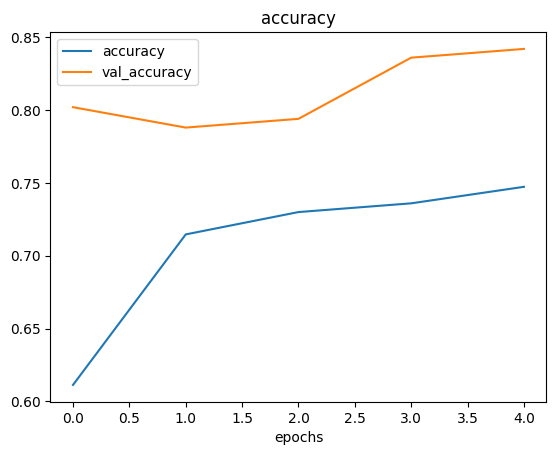

In [41]:
plot_accuracy_curves(history_7)

# How to improve model performance

1. we can add more Convulatioal layers
2. we can add more filters
3. train for long
4. get more data
5. transfer learning

# Making prediction using custom input

--2025-06-05 16:25:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-06-05 16:25:25 (35.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



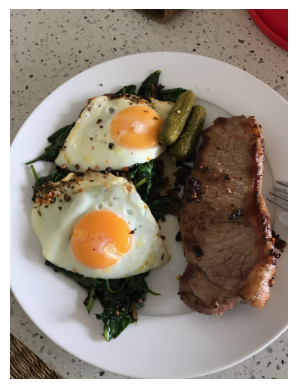

In [42]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [43]:
steak.shape

(4032, 3024, 3)

1. when you train a model and want to make a prediction with your own image or data, make sure your data has the same shape as the models input shape.
2. In this case our data has 3 dimensions and shape (4032,3024,3), it needs to have 4 dimensions as we pass in data in batches and the image shape should be (224,224,3)
3. And most of all we need to normalize it (img/255)

# function that makes image ready for predict

Tensorflow has a lot of documentation on how to load and preprocess different ypes of data like csv, df, images and many more. If in doubt go and have a look.

In [44]:
def load_prep_image(filename,img_size=224):
  # read in the image
  img = tf.io.read_file(filename)
  # decode the image into a tensor. note that TF has many functions to load in data
  # of different types like tabular data, images and etc
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img,size=[img_size,img_size])
  # normalize the image (btw 0 and 1)
  img = img/255.

  return img

In [45]:
steak_new = load_prep_image("03-steak.jpeg")
steak_new

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [46]:
pred_val = model_7.predict(tf.expand_dims(steak_new,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


In [47]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [48]:
pred_class = class_names[int(tf.round(pred_val))]
pred_class

np.str_('steak')

In [85]:
def pred_and_plot(model,filename,class_names):
  img = load_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  # plotting image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  return pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.8404421]], dtype=float32)

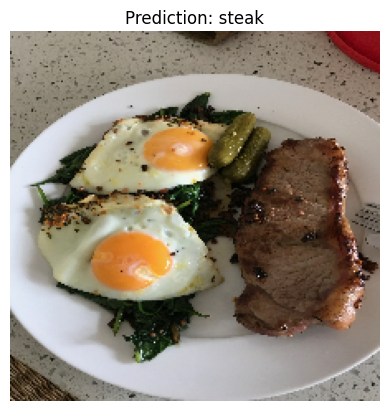

In [56]:
pred_and_plot(model_7,"03-steak.jpeg",class_names)

# model 7 prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.60706776]], dtype=float32)

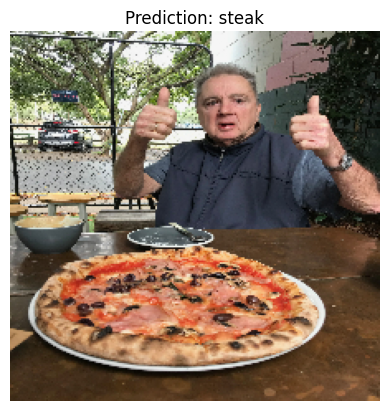

In [57]:
pred_and_plot(model_7,"/content/03-pizza-dad.jpeg",class_names)

# model 5 prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[0.33880302]], dtype=float32)

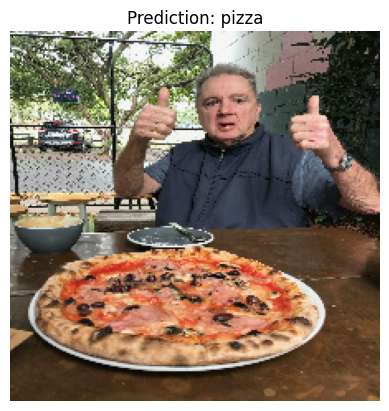

In [58]:
pred_and_plot(model_5,"/content/03-pizza-dad.jpeg",class_names)

# model 6 prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.357486]], dtype=float32)

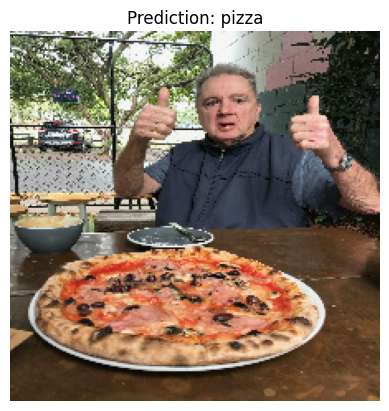

In [59]:
pred_and_plot(model_6,"/content/03-pizza-dad.jpeg",class_names)

# MULTICLASS CNN

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

## Knowing your data

In [60]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-06-05 16:31:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 192.178.163.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.8MB/s    in 11s     

2025-06-05 16:32:08 (46.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [61]:
import pathlib
data_dir = pathlib.Path('10_food_classes_all_data/test')
# converts that string into a Path object, which is more powerful and flexible for file and directory operations
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) # '*' lists all files
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


 notice that not all the images are in the same shape

image shape = (512, 512, 3)


array([[[22,  0, 27],
        [23,  0, 28],
        [23,  0, 28],
        ...,
        [24,  1, 29],
        [24,  1, 29],
        [24,  1, 29]],

       [[23,  0, 28],
        [23,  0, 28],
        [23,  0, 28],
        ...,
        [23,  0, 28],
        [23,  0, 28],
        [23,  0, 28]],

       [[21,  1, 28],
        [21,  1, 28],
        [23,  0, 28],
        ...,
        [23,  0, 28],
        [23,  0, 28],
        [23,  0, 28]],

       ...,

       [[24,  4, 29],
        [23,  4, 26],
        [23,  3, 28],
        ...,
        [15,  0, 26],
        [17,  0, 26],
        [15,  0, 26]],

       [[25,  6, 28],
        [25,  6, 26],
        [25,  6, 28],
        ...,
        [18,  0, 27],
        [18,  0, 26],
        [17,  0, 26]],

       [[26,  7, 27],
        [26,  7, 27],
        [27,  8, 28],
        ...,
        [19,  0, 27],
        [19,  0, 27],
        [18,  0, 26]]], dtype=uint8)
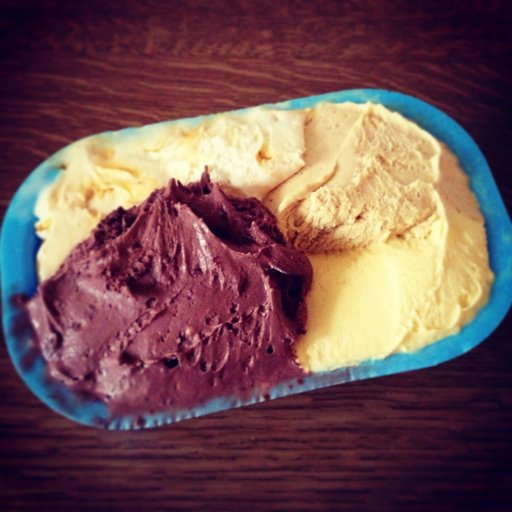

In [62]:
view_random_image('10_food_classes_all_data/train/', 'ice_cream')

In [63]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

## pre-processing the data

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [65]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                                class_mode = 'categorical',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [66]:
len(train_data)

235

In [67]:
images, labels = train_data[0]
images[0].shape, labels[0]

((224, 224, 3), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

## model_8, creating the CNN explainer model

In [68]:
# build model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.1176 - loss: 2.2976 - val_accuracy: 0.1632 - val_loss: 2.2512
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.2609 - loss: 2.0695 - val_accuracy: 0.2624 - val_loss: 2.0668
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.5637 - loss: 1.3149 - val_accuracy: 0.2896 - val_loss: 2.1700
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.8083 - loss: 0.6288 - val_accuracy: 0.2648 - val_loss: 2.8243
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 128ms/step - accuracy: 0.9545 - loss: 0.1776 - val_accuracy: 0.2524 - val_loss: 4.4302


we can clearly see that the model is overfitting

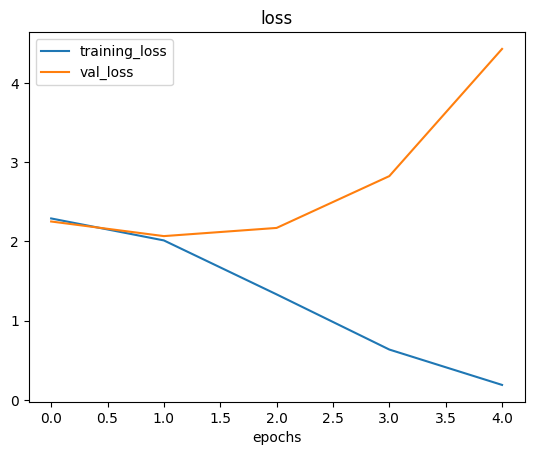

In [70]:
plot_loss_curves(history_8)

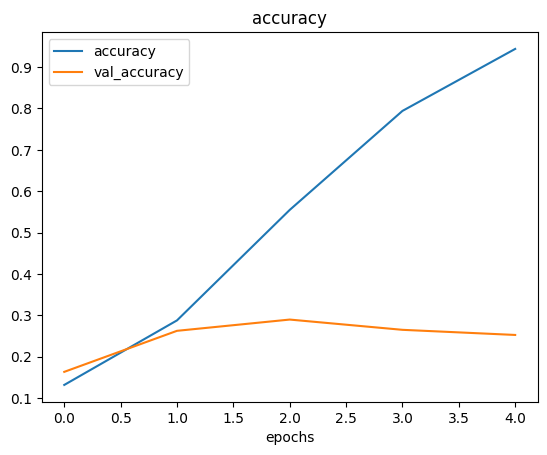

In [71]:
plot_accuracy_curves(history_8)

In [72]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2514 - loss: 4.4819


[4.4302215576171875, 0.2524000108242035]

# model 9, a simplified model 8

In [76]:
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=10,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step - accuracy: 0.1405 - loss: 2.4750 - val_accuracy: 0.1844 - val_loss: 2.1890
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.2375 - loss: 2.1030 - val_accuracy: 0.2456 - val_loss: 2.0802
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.3193 - loss: 1.9313 - val_accuracy: 0.2972 - val_loss: 1.9857
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.4317 - loss: 1.6689 - val_accuracy: 0.3044 - val_loss: 2.0192
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 126ms/step - accuracy: 0.6229 - loss: 1.1995 - val_accuracy: 0.2800 - val_loss: 2.3732


it seems to be still overfitting, so lets try data augmentation

# model_10, model 9 with data augmentation

In [79]:
train_data_augmented_cat = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,# value in percentage
                                              shear_range=0.2,#how much you wanna shear the image
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3)

In [80]:
train_data_cat_augmented = train_data_augmented_cat.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [81]:
model_10 = tf.keras.models.clone_model(model_9)

model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_cat_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.1040 - loss: 2.3310 - val_accuracy: 0.1456 - val_loss: 2.2843
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 546ms/step - accuracy: 0.1198 - loss: 2.2913 - val_accuracy: 0.1668 - val_loss: 2.2665
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 543ms/step - accuracy: 0.1692 - loss: 2.2734 - val_accuracy: 0.1748 - val_loss: 2.1988
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 543ms/step - accuracy: 0.1543 - loss: 2.2631 - val_accuracy: 0.1884 - val_loss: 2.1949
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.1768 - loss: 2.2215 - val_accuracy: 0.1920 - val_loss: 2.1763


we can see its a horrible model. I am going to move on to transfer learning but you can you keep trying new things to imporove the model.

In [82]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.1983 - loss: 2.1781


[2.176333427429199, 0.19200000166893005]

# model 10 prediction

In [83]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.04038596, 0.09104241, 0.10560319, 0.07166582, 0.08688498,
        0.1769428 , 0.07196392, 0.12662415, 0.11160117, 0.11728548]],
      dtype=float32)

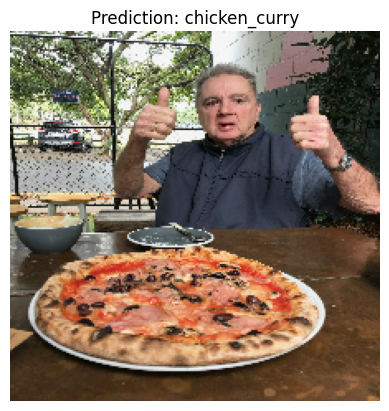

In [86]:
pred_and_plot(model_10,"/content/03-pizza-dad.jpeg",class_names)

# model 9 prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


array([[4.3834541e-02, 2.7535914e-02, 3.9143273e-01, 7.6589305e-03,
        1.1237132e-02, 9.2377320e-02, 2.4985498e-02, 3.5689881e-01,
        4.3774340e-02, 2.6477920e-04]], dtype=float32)

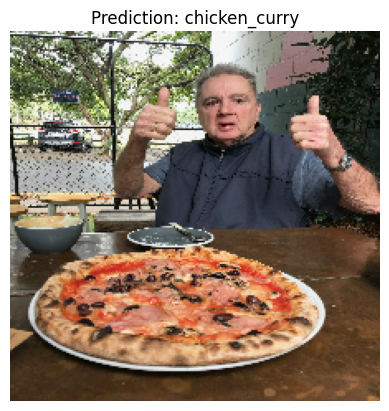

In [87]:
pred_and_plot(model_9,"/content/03-pizza-dad.jpeg",class_names)

# BOI BOI